<p style="font-size: 30px; line-height: 135%;}">
<b>3 Análisis de emociones en tweets</b>
</p>

In [31]:
import pandas as pd
import numpy as np
from collections import Counter
import re
import nltk
#nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from IPython.display import display

<p style="font-size: 25px; line-height: 135%;}">
<b>Parte 3, pregunta a</b>
</p>

In [32]:
df = pd.read_csv('./text_emotion.csv')
pd.options.display.max_colwidth = 150
display(df.head(5))

print(df.shape)
print("Existen %i clases" % len(set(df.iloc[:,1])))
print(Counter(df.iloc[:,1]))

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin on your call...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will."


(40000, 4)
Existen 13 clases
Counter({'neutral': 8638, 'worry': 8459, 'happiness': 5209, 'sadness': 5165, 'love': 3842, 'surprise': 2187, 'fun': 1776, 'relief': 1526, 'hate': 1323, 'empty': 827, 'enthusiasm': 759, 'boredom': 179, 'anger': 110})


<p style="font-size: 18px; line-height: 135%;}">
<b>a)</b>
El dataset está compuesto por 40000 registros, cada registro que corresponde a un tweet contiene id, autor, contenido del tweet y una clase de sentiemiento.
Existe un total de 13 clases.
</p>

<p style="font-size: 25px; line-height: 135%;}">
<b>Parte 3, pregunta c</b>
</p>

In [33]:
'''for i in range(len(df.index)):
    df.ix[i,3] = df.iloc[i,3].lower()
    df.ix[i,3] = re.sub('[^\w]', ' ', df.iloc[i,3])
    df.ix[i,3] = re.sub(r' +' ,' ', df.iloc[i,3])
    df.ix[i,3] = re.sub(r'^ +' ,'', df.iloc[i,3])
'''
stops = set(stopwords.words('english'))
split_content = [line.split() for line in df.iloc[:,3]]
lemma = WordNetLemmatizer()
for i in range(len(df.index)):
    aux = [lemma.lemmatize(word) for word in split_content[i]]
    df.iloc[i,3] = ' '.join([word for word in aux if word not in stops])

<p style="font-size: 18px; line-height: 135%;}">
<b>c)</b>
Para el preprocesamiento se eliminan puntuciones y simbolos, además de hacer una lematización para las palabras. Más adelante al crear 'bag of words' con la función countervectorizer se eliminan las palabras que aparecen menos de 5 veces en el total de tweet con el objeto de eliminar aquellas palabras mal escritas y nombres propios que no suelen repetirse y no tienen incidencia en la polaridad del tweet.
</p>

<p style="font-size: 25px; line-height: 135%;}">
<b>Parte 3, pregunta b y d</b>
</p>

In [34]:
df_feliz = df[(df['sentiment'] == 'happiness')].copy()
df_triste = df[(df['sentiment'] == 'sadness')].copy()

clase_feliz = [1 for x in range(len(df_feliz.index))]
clase_triste = [-1 for x in range(len(df_triste.index))]

clase_feliz = pd.Series(clase_feliz)
clase_triste = pd.Series(clase_triste)

df_feliz['clase'] = clase_feliz.values
df_triste['clase'] = clase_triste.values

df_train = pd.DataFrame(columns = df_feliz.columns)
df_test = pd.DataFrame(columns = df_feliz.columns)

msk = np.random.rand(len(df_feliz)) < 0.8
df_train = df_train.append(df_feliz[msk], ignore_index=True)
df_test = df_test.append(df_feliz[~msk], ignore_index=True)

msk = np.random.rand(len(df_triste)) < 0.8
df_train = df_train.append(df_triste[msk], ignore_index=True)
df_test = df_test.append(df_triste[~msk], ignore_index=True)

df_test['clase'] = df_test["clase"].astype(int)
df_train['clase'] = df_train["clase"].astype(int)

#display(df_test.head())

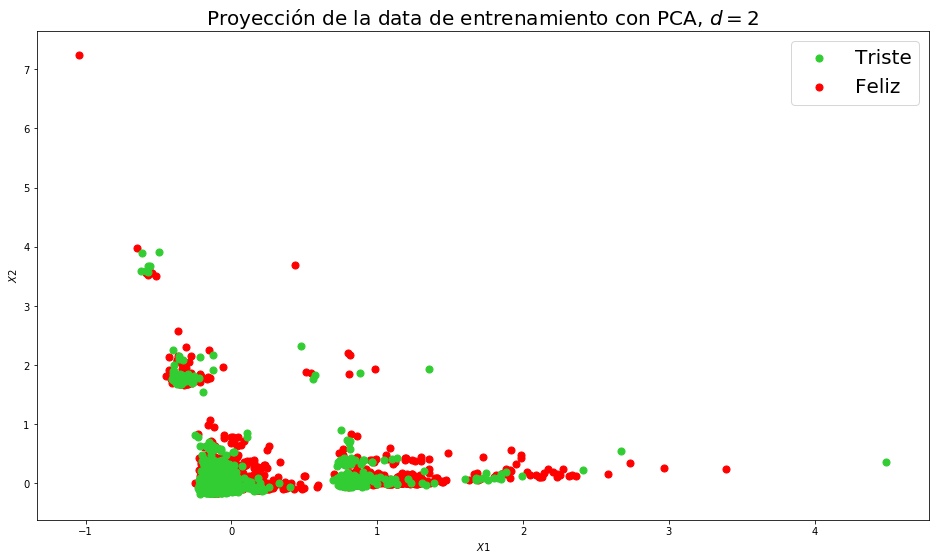

In [57]:
from sklearn.decomposition import PCA
d=2
pca_model = PCA(n_components=d)
pca_model.fit(cv_train.toarray())
X_pca_train = pca_model.transform(cv_train.toarray())

#Se procede a gráficar los elementos
plt.figure(figsize = (16, 9))

for i in range(len(X_pca_train)):
    if df_train.iloc[i,4] == -1:
        p1 = plt.scatter(X_pca_train[i,0], X_pca_train[i,1], s=50, c = "limegreen")
    elif df_train.iloc[i,4] == 1:
        p2 = plt.scatter(X_pca_train[i,0], X_pca_train[i,1], s=50, c = "red")

plt.legend([p1, p2], ["Triste", "Feliz"], prop={'size': 20})
        
plt.xlabel("$X1$")
plt.ylabel("$X2$")
plt.title("Proyección de la data de entrenamiento con PCA, $d = "+str(d)+"$", size = 20)
plt.show()

<p style="font-size: 18px; line-height: 135%;}">
<b>b) y  d)</b>
En esta parte para evitar el desbalanceo que podría generar una mala máquina en casos como las que corresponden a árboles, se toman solo dos clases que son las de felicidad y tristeza. Se usan solo estás dos clases ya que además de poseer casi la misma cantidad de datos son espcialmente útiles como clasificación binaria de positivo y negativo si se considera que tristeza puede traducirse como no felicidad, por otro lado es díficil incluir todas las 13 clases del dataset y clasificarlas de forma binaria ya que son sentimientos muy variados, además se tiene la clase neutral que no corresponde a una polaridad, es decir, no es una opinión/sentimiento si no que más bien corresponden a comentarios.
</p>

<p style="font-size: 25px; line-height: 135%;}">
<b>Parte 3, pregunta e</b>
</p>

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(min_df = 5)
cv_train = cv.fit_transform(df_train.iloc[:, 3])

cv_test = cv.transform(df_test.iloc[:, 3])
#print(cv.get_feature_names())

<p style="font-size: 18px; line-height: 135%;}">
<b>e)</b>
Para construir el modelo bag of words se utiliza la función CounterVectorizer incluida en el paquete sklearn, se incluye una tolerancia de palabras admitidas con un mínimo de 5 apariciones. Hacer lo anterior es importante por dos motivos, el primero es que así se evita incluir palabras que están mal escritas o nombres de cuentas de twitter citados en los mismo tweets, las cuales no tendrían una mayor incidencia en el resultado de las predicciones, además como segundo y resultado de eliminar estás palabras 'basura' se logra disminuir la dimensionalidad lo que se traduce en desempeño computacional de la máquina.
</p>

In [36]:
display(cv_train)

<8283x1860 sparse matrix of type '<class 'numpy.int64'>'
	with 54574 stored elements in Compressed Sparse Row format>

<p style="font-size: 25px; line-height: 135%;}">
<b>Parte 3, pregunta f y g</b>
</p>

In [63]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

m_svm = SVC()
m_svm.set_params(kernel = 'linear')

m_svmRBF = SVC()
m_svmRBF.set_params(kernel = 'rbf')

verdad = df_train.iloc[:, 4]

m_svm.fit(cv_train, verdad)
m_svmRBF.fit(cv_train, verdad)

m_lr = LogisticRegression()
m_lr.fit(cv_train, verdad)

m_qda = QuadraticDiscriminantAnalysis()
#m_qda.fit(cv_train.toarray(), df_train.iloc[:, 4])

m_lda = LinearDiscriminantAnalysis()
m_lda.fit(cv_train.toarray(), verdad)

m_mnb = MultinomialNB()
m_mnb.fit(cv_train, verdad)

m_bnb = BernoulliNB()
m_bnb.fit(cv_train, verdad)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [38]:
from sklearn.metrics import classification_report
def score_the_model(model,x,y,xt,yt):
    acc_tr = model.score(x,y)
    acc_test = model.score(xt[:-1],yt[:-1])
    print("Training Accuracy: %f" % (acc_tr))
    print("Test Accuracy: %f" % (acc_test))
    print("Detailed Analysis Testing Results ...")
    print(classification_report(yt, model.predict(xt), target_names=['+','-']))
    acc_train_all.append(acc_tr)
    acc_test_all.append(acc_test)

In [39]:
print(m_svm)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [64]:
acc_train_all = list()
acc_test_all = list()

score_the_model(m_svmRBF, cv_train, df_train.iloc[:,4], cv_test, df_test.iloc[:,4])
score_the_model(m_svm, cv_train, df_train.iloc[:,4], cv_test, df_test.iloc[:,4])
score_the_model(m_lr, cv_train, df_train.iloc[:,4], cv_test, df_test.iloc[:,4])
score_the_model(m_lda, cv_train, df_train.iloc[:,4], cv_test, df_test.iloc[:,4])
score_the_model(m_mnb, cv_train, df_train.iloc[:,4], cv_test, df_test.iloc[:,4])
score_the_model(m_bnb, cv_train, df_train.iloc[:,4], cv_test, df_test.iloc[:,4])


Training Accuracy: 0.594350
Test Accuracy: 0.582297
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.91      0.18      0.31      1046
          -       0.55      0.98      0.70      1045

avg / total       0.73      0.58      0.50      2091

Training Accuracy: 0.890499
Test Accuracy: 0.787081
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.79      0.78      0.78      1046
          -       0.78      0.80      0.79      1045

avg / total       0.79      0.79      0.79      2091

Training Accuracy: 0.879271
Test Accuracy: 0.793780
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.81      0.77      0.79      1046
          -       0.78      0.81      0.80      1045

avg / total       0.79      0.79      0.79      2091

Training Accuracy: 0.879150
Test Accuracy: 0.759809
Detailed Analysis Testing Results

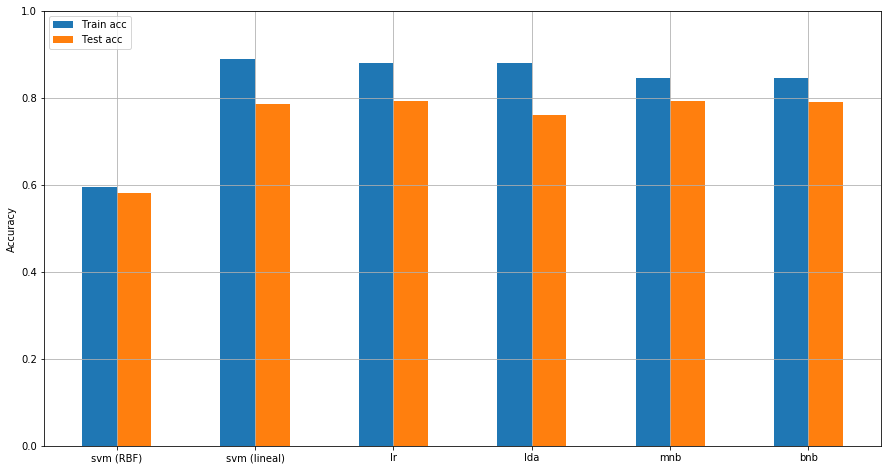

In [65]:
import matplotlib.pyplot as plt

nom = list(['svm (RBF)','svm (lineal)', 'lr', 'lda', 'mnb', 'bnb'])
pos = list(range(6))
width = 0.25

acc_train_all = np.array(acc_train_all)

fig, ax = plt.subplots(figsize=(15,8))

plt.bar(pos, acc_train_all, width)
plt.bar([p + width for p in pos], acc_test_all, width)

ax.set_ylabel('Accuracy')

ax.set_xticks([p + width*0.5 for p in pos])
ax.set_xticklabels(nom)

plt.ylim([0,1])
plt.legend(['Train acc', 'Test acc'], loc='upper left')
plt.grid()

plt.show()

<p style="font-size: 18px; line-height: 135%;}">
<b>f)</b>
De los modelos utilizados con sus parámetros por defecto, el que presenta un peor comportamiento es SVM, mientras que el resto de las 4 máquinas tienen un desempeño similar alcanzando una cota para la exactitud que llega al 80%.
</p>

<p style="font-size: 18px; line-height: 135%;}">
<b>g)</b>
Las métricas corresponden a:<br>
Accuracy: Es la exactitud, es decir, los resultados que fueron correctos sobre el total de resultados. 
<br><br>
Precision: La precision se refiere a la relación de verdaderos positivos sobre la clase positiva. Por ejemplo para el caso de la clase positiva, la métrica evaluará todos los resultados correctos de la clase positiva todos los resuldos predichos de clase positiva independiente de si fueron correctos.
<br><br>
Recall: Similar a precision, hace referencia a la relación de verdaderos positivos sobre el total de verdaderos positivos y falsos negativos. Por ejemplo para el caso de la clase positiva, la métrica evaluará todos los resultados correctos de la clase positiva sobre la cantidad de resultados correctos posibles.
<br><br>
F1-Score: Métrica desde 0 a 1, siendo 1 el mejor. Es una relación mesurada que incluye precision y recall.
</p>

<p style="font-size: 25px; line-height: 135%;}">
<b>Parte 3, pregunta i</b>
</p>

In [42]:
df_neutral = df[(df['sentiment'] == 'neutral')].copy()
df_worry = df[(df['sentiment'] == 'worry')].copy()
df_happiness = df[(df['sentiment'] == 'happiness')].copy()
df_sadness = df[(df['sentiment'] == 'sadness')].copy()
df_love = df[(df['sentiment'] == 'love')].copy()
df_surprise = df[(df['sentiment'] == 'surprise')].copy()
df_fun = df[(df['sentiment'] == 'fun')].copy()
df_relief = df[(df['sentiment'] == 'relief')].copy()
df_hate = df[(df['sentiment'] == 'hate')].copy()
df_empty = df[(df['sentiment'] == 'empty')].copy()
df_enthusiasm = df[(df['sentiment'] == 'enthusiasm')].copy()
df_boredom = df[(df['sentiment'] == 'boredom')].copy()
df_anger = df[(df['sentiment'] == 'anger')].copy()

clase_neutral = [0 for x in range(len(df_neutral.index))]
clase_worry = [1 for x in range(len(df_worry.index))]
clase_happiness = [2 for x in range(len(df_happiness.index))]
clase_sadness = [3 for x in range(len(df_sadness.index))]
clase_love = [4 for x in range(len(df_love.index))]
clase_surprise = [5 for x in range(len(df_surprise.index))]
clase_fun = [6 for x in range(len(df_fun.index))]
clase_relief = [7 for x in range(len(df_relief.index))]
clase_hate = [8 for x in range(len(df_hate.index))]
clase_empty = [9 for x in range(len(df_empty.index))]
clase_enthusiasm = [10 for x in range(len(df_enthusiasm.index))]
clase_boredom = [11 for x in range(len(df_boredom.index))]
clase_anger = [12 for x in range(len(df_anger.index))]

clase_neutral = pd.Series(clase_neutral)
clase_worry = pd.Series(clase_worry)
clase_happiness = pd.Series(clase_happiness)
clase_sadness = pd.Series(clase_sadness)
clase_love = pd.Series(clase_love)
clase_surprise = pd.Series(clase_surprise)
clase_fun = pd.Series(clase_fun)
clase_relief = pd.Series(clase_relief)
clase_hate = pd.Series(clase_hate)
clase_empty = pd.Series(clase_empty)
clase_enthusiasm = pd.Series(clase_enthusiasm)
clase_boredom = pd.Series(clase_boredom)
clase_anger = pd.Series(clase_anger)

df_neutral['clase'] = clase_neutral.values
df_worry['clase'] = clase_worry.values
df_happiness['clase'] = clase_happiness.values
df_sadness['clase'] = clase_sadness.values
df_love['clase'] = clase_love.values
df_surprise['clase'] = clase_surprise.values
df_fun['clase'] = clase_fun.values
df_relief['clase'] = clase_relief.values
df_hate['clase'] = clase_hate.values
df_empty['clase'] = clase_empty.values
df_enthusiasm['clase'] = clase_enthusiasm.values
df_boredom['clase'] = clase_boredom.values
df_anger['clase'] = clase_anger.values

df_train_2 = pd.DataFrame(columns = df_neutral.columns)
df_test_2 = pd.DataFrame(columns = df_neutral.columns)

msk = np.random.rand(len(df_neutral)) < 0.8
df_train_2 = df_train.append(df_neutral[msk], ignore_index=True)
df_test_2 = df_test.append(df_neutral[~msk], ignore_index=True)

msk = np.random.rand(len(df_worry)) < 0.8
df_train_2 = df_train.append(df_worry[msk], ignore_index=True)
df_test_2 = df_test.append(df_worry[~msk], ignore_index=True)

msk = np.random.rand(len(df_happiness)) < 0.8
df_train_2 = df_train.append(df_happiness[msk], ignore_index=True)
df_test_2 = df_test.append(df_happiness[~msk], ignore_index=True)

msk = np.random.rand(len(df_sadness)) < 0.8
df_train_2 = df_train.append(df_sadness[msk], ignore_index=True)
df_test_2 = df_test.append(df_sadness[~msk], ignore_index=True)

msk = np.random.rand(len(df_love)) < 0.8
df_train_2 = df_train.append(df_love[msk], ignore_index=True)
df_test_2 = df_test.append(df_love[~msk], ignore_index=True)

msk = np.random.rand(len(df_surprise)) < 0.8
df_train_2 = df_train.append(df_surprise[msk], ignore_index=True)
df_test_2 = df_test.append(df_surprise[~msk], ignore_index=True)

msk = np.random.rand(len(df_fun)) < 0.8
df_train_2 = df_train.append(df_fun[msk], ignore_index=True)
df_test_2 = df_test.append(df_fun[~msk], ignore_index=True)

msk = np.random.rand(len(df_relief)) < 0.8
df_train_2 = df_train.append(df_relief[msk], ignore_index=True)
df_test_2 = df_test.append(df_relief[~msk], ignore_index=True)

msk = np.random.rand(len(df_hate)) < 0.8
df_train_2 = df_train.append(df_hate[msk], ignore_index=True)
df_test_2 = df_test.append(df_hate[~msk], ignore_index=True)

msk = np.random.rand(len(df_empty)) < 0.8
df_train_2 = df_train.append(df_empty[msk], ignore_index=True)
df_test_2 = df_test.append(df_empty[~msk], ignore_index=True)

msk = np.random.rand(len(df_enthusiasm)) < 0.8
df_train_2 = df_train.append(df_enthusiasm[msk], ignore_index=True)
df_test_2 = df_test.append(df_enthusiasm[~msk], ignore_index=True)

msk = np.random.rand(len(df_boredom)) < 0.8
df_train_2 = df_train.append(df_boredom[msk], ignore_index=True)
df_test_2 = df_test.append(df_boredom[~msk], ignore_index=True)

msk = np.random.rand(len(df_anger)) < 0.8
df_train_2 = df_train.append(df_anger[msk], ignore_index=True)
df_test_2 = df_test.append(df_anger[~msk], ignore_index=True)

df_train_2["clase"] = df_train_2["clase"].astype(int)
df_test_2["clase"] = df_test_2["clase"].astype(int)

<p style="font-size: 18px; line-height: 135%;}">
<b>h)</b>
Igual que de la forma anterior se divide el set de tal forma que la cantidad de elementos de cierta clase que quedan en el test set es equitativa a la que queda en el trainig set.
</p>

<p style="font-size: 25px; line-height: 135%;}">
<b>Parte 3, pregunta j</b>
</p>

In [43]:
cv = CountVectorizer(min_df = 5)
cv_train_2 = cv.fit_transform(df_train_2.iloc[:, 3])
cv_test_2 = cv.transform(df_test_2.iloc[:, 3])

acc_train_all = list()
acc_test_all = list()

m_mnb = BernoulliNB()
m_mnb.fit(cv_train_2, df_train_2.iloc[:, 4])
acc_train_all.append(m_mnb.score(cv_train_2, df_train_2.iloc[:,4]))
acc_test_all.append(m_mnb.score(cv_test_2, df_test_2.iloc[:, 4]))

m_lda = LinearDiscriminantAnalysis()
m_lda.fit(cv_train_2.toarray(), df_train_2.iloc[:, 4])
acc_train_all.append(m_lda.score(cv_train_2, df_train_2.iloc[:,4]))
acc_test_all.append(m_lda.score(cv_test_2, df_test_2.iloc[:, 4]))

m_lr = LogisticRegression()
m_lr.set_params(multi_class='multinomial', solver='newton-cg')
m_lr.fit(cv_train_2.toarray(), df_train_2.iloc[:, 4])
acc_train_all.append(m_lr.score(cv_train_2, df_train_2.iloc[:,4]))
acc_test_all.append(m_lr.score(cv_test_2, df_test_2.iloc[:, 4]))

In [44]:
print(acc_train_all)

[0.83801218492414287, 0.87014693584995817, 0.87862859873372356]


In [45]:
print(acc_train_all)

[0.83801218492414287, 0.87014693584995817, 0.87862859873372356]


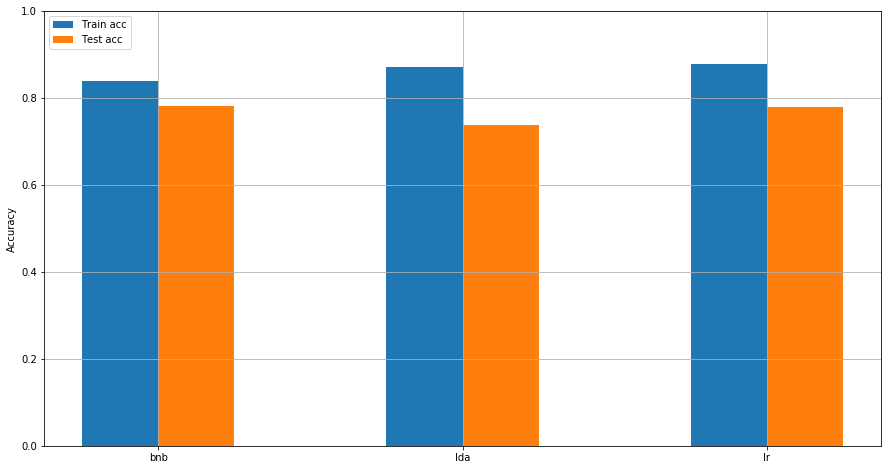

In [46]:
import matplotlib.pyplot as plt

nom = list(['bnb', 'lda', 'lr'])
pos = list(range(3))
width = 0.25

acc_train_all = np.array(acc_train_all)

fig, ax = plt.subplots(figsize=(15,8))

plt.bar(pos, acc_train_all, width)
plt.bar([p + width for p in pos], acc_test_all, width)

ax.set_ylabel('Accuracy')

ax.set_xticks([p + width*0.5 for p in pos])
ax.set_xticklabels(nom)

plt.ylim([0,1])
plt.legend(['Train acc', 'Test acc'], loc='upper left')
plt.grid()

plt.show()

<p style="font-size: 18px; line-height: 135%;}">
<b>j)</b>
Para este caso donde se trabaja con multiples clases, se utilizan 3 diferentes máquinas las cuales entregan un resultado similar a cuando se trabajo de forma binaria.
</p>

<p style="font-size: 25px; line-height: 135%;}">
<b>Parte 3, pregunta k</b>
</p>

In [47]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier

acc_train_all = list()
acc_test_all = list()

m_svm_ovr = OneVsRestClassifier(SVC())
m_svm_ovr.fit(cv_train_2, df_train_2.iloc[:, 4])
acc_train_all.append(m_svm_ovr.score(cv_train_2, df_train_2.iloc[:,4]))
acc_test_all.append(m_svm_ovr.score(cv_test_2, df_test_2.iloc[:, 4]))

m_svm_ovo = OneVsOneClassifier(SVC())
m_svm_ovo.fit(cv_train_2, df_train_2.iloc[:, 4])
acc_train_all.append(m_svm_ovo.score(cv_train_2, df_train_2.iloc[:,4]))
acc_test_all.append(m_svm_ovo.score(cv_test_2, df_test_2.iloc[:, 4]))

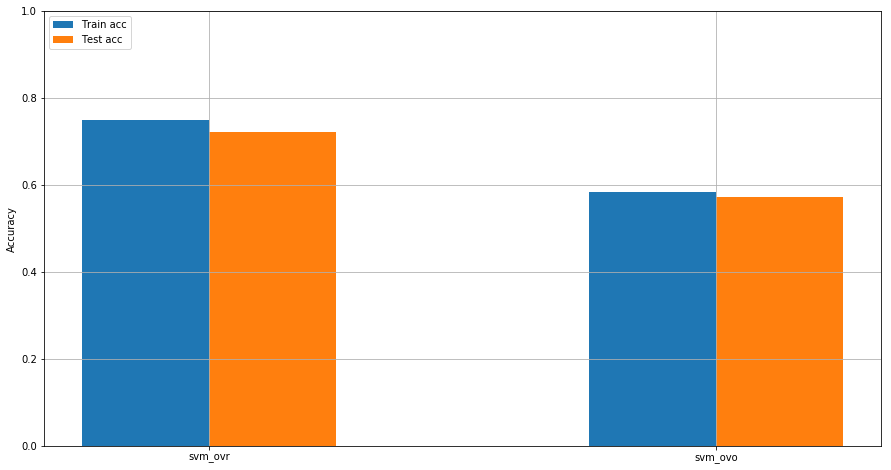

In [48]:
nom = list(['svm_ovr', 'svm_ovo'])
pos = list(range(2))
width = 0.25

acc_train_all = np.array(acc_train_all)

fig, ax = plt.subplots(figsize=(15,8))

plt.bar(pos, acc_train_all, width)
plt.bar([p + width for p in pos], acc_test_all, width)

ax.set_ylabel('Accuracy')

ax.set_xticks([p + width*0.5 for p in pos])
ax.set_xticklabels(nom)

plt.ylim([0,1])
plt.legend(['Train acc', 'Test acc'], loc='upper left')
plt.grid()

plt.show()

<p style="font-size: 18px; line-height: 135%;}">
<b>k)</b>
Al utilizar svm para múltiples clases extendido mediante los métodos de ovr y ovo, se da cuenta que el comportamiento es peor que los módelos evaluados anterioremente. Cuando se utiliza one-vs-one se obtienen peores resultados que con one-vs-rest, el aloritmo ovo tiene un gran costo computacional ya que se construye una máquina para cada par de clases.
</p>

<p style="font-size: 25px; line-height: 135%;}">
<b>Parte 3, pregunta l
</b>
</p>

In [49]:
acc_train_all = list()
acc_test_all = list()

m_lr_ovr = LogisticRegression()
m_lr_ovr.set_params(multi_class='ovr')
m_lr_ovr.fit(cv_train_2.toarray(), df_train_2.iloc[:, 4])
acc_train_all.append(m_lr_ovr.score(cv_train_2, df_train_2.iloc[:,4]))
acc_test_all.append(m_lr_ovr.score(cv_test_2, df_test_2.iloc[:, 4]))

m_lr_mul = LogisticRegression()
m_lr_mul.set_params(multi_class='multinomial', solver='newton-cg')
m_lr_mul.fit(cv_train_2.toarray(), df_train_2.iloc[:, 4])
acc_train_all.append(m_lr_mul.score(cv_train_2, df_train_2.iloc[:,4]))
acc_test_all.append(m_lr_mul.score(cv_test_2, df_test_2.iloc[:, 4]))

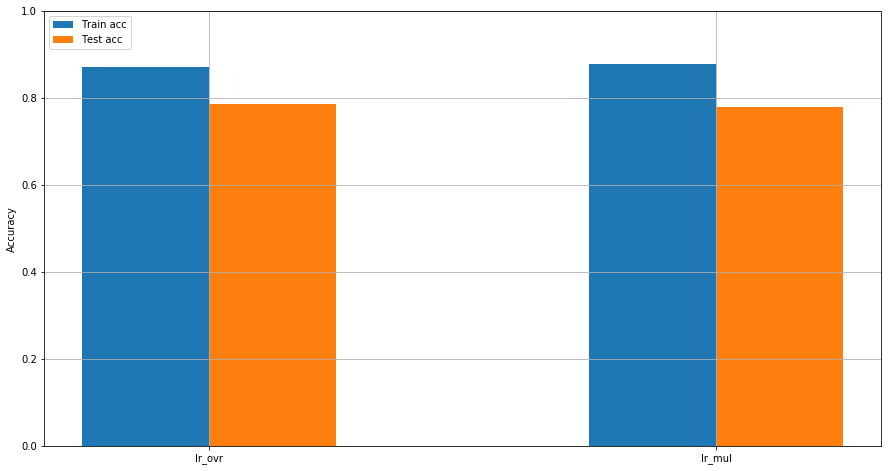

In [50]:
nom = list(['lr_ovr', 'lr_mul'])
pos = list(range(2))
width = 0.25

acc_train_all = np.array(acc_train_all)

fig, ax = plt.subplots(figsize=(15,8))

plt.bar(pos, acc_train_all, width)
plt.bar([p + width for p in pos], acc_test_all, width)

ax.set_ylabel('Accuracy')

ax.set_xticks([p + width*0.5 for p in pos])
ax.set_xticklabels(nom)

plt.ylim([0,1])
plt.legend(['Train acc', 'Test acc'], loc='upper left')
plt.grid()

plt.show()

<p style="font-size: 18px; line-height: 135%;}">
<b>f)</b>
Ambos métodos es decir tanto ovr como multinomial arrojan un resultado similar, siendo ovr un poco mejor en la exactitud de las predicciones para el test set
</p>

<p style="font-size: 25px; line-height: 135%;}">
<b>Parte 3, pregunta m</b>
</p>

In [51]:
acc_train_all = list()
acc_test_all = list()

m_svm_ovr = OneVsRestClassifier(SVC())
m_svm_ovr.fit(cv_train_2, df_train_2.iloc[:, 4])
acc_train_all.append(m_svm_ovr.score(cv_train_2, df_train_2.iloc[:,4]))
acc_test_all.append(m_svm_ovr.score(cv_test_2, df_test_2.iloc[:, 4]))

m_svm_ovo = OneVsOneClassifier(SVC())
m_svm_ovo.fit(cv_train_2, df_train_2.iloc[:, 4])
acc_train_all.append(m_svm_ovo.score(cv_train_2, df_train_2.iloc[:,4]))
acc_test_all.append(m_svm_ovo.score(cv_test_2, df_test_2.iloc[:, 4]))

m_lr_ovr = LogisticRegression()
m_lr_ovr.set_params(multi_class='ovr')
m_lr_ovr.fit(cv_train_2.toarray(), df_train_2.iloc[:, 4])
acc_train_all.append(m_lr_ovr.score(cv_train_2, df_train_2.iloc[:,4]))
acc_test_all.append(m_lr_ovr.score(cv_test_2, df_test_2.iloc[:, 4]))

m_lr_mul = LogisticRegression()
m_lr_mul.set_params(multi_class='multinomial', solver='newton-cg')
m_lr_mul.fit(cv_train_2.toarray(), df_train_2.iloc[:, 4])
acc_train_all.append(m_lr_mul.score(cv_train_2, df_train_2.iloc[:,4]))
acc_test_all.append(m_lr_mul.score(cv_test_2, df_test_2.iloc[:, 4]))

m_mnb = BernoulliNB()
m_mnb.fit(cv_train_2, df_train_2.iloc[:, 4])
acc_train_all.append(m_mnb.score(cv_train_2, df_train_2.iloc[:,4]))
acc_test_all.append(m_mnb.score(cv_test_2, df_test_2.iloc[:, 4]))

m_lda = LinearDiscriminantAnalysis()
m_lda.fit(cv_train_2.toarray(), df_train_2.iloc[:, 4])
acc_train_all.append(m_lda.score(cv_train_2, df_train_2.iloc[:,4]))
acc_test_all.append(m_lda.score(cv_test_2, df_test_2.iloc[:, 4]))


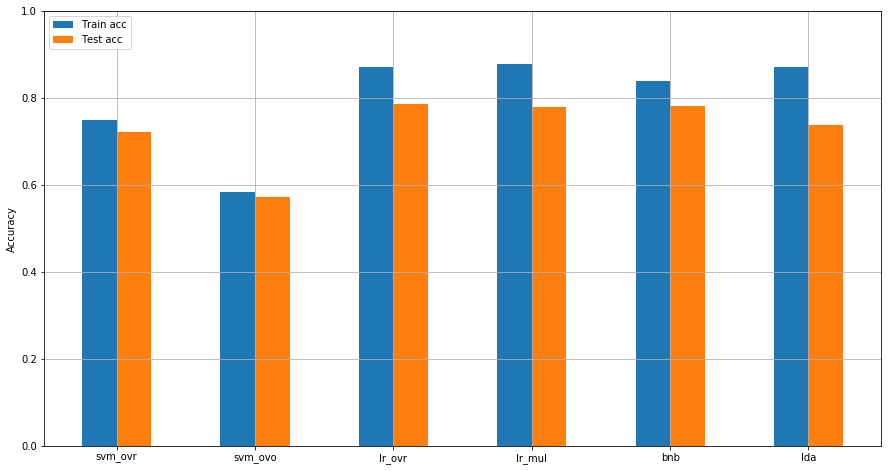

In [52]:
nom = list(['svm_ovr', 'svm_ovo', 'lr_ovr', 'lr_mul', 'bnb', 'lda'])
pos = list(range(6))
width = 0.25

acc_train_all = np.array(acc_train_all)

fig, ax = plt.subplots(figsize=(15,8))

plt.bar(pos, acc_train_all, width)
plt.bar([p + width for p in pos], acc_test_all, width)

ax.set_ylabel('Accuracy')

ax.set_xticks([p + width*0.5 for p in pos])
ax.set_xticklabels(nom)

plt.ylim([0,1])
plt.legend(['Train acc', 'Test acc'], loc='upper left')
plt.grid()

plt.show()

<p style="font-size: 18px; line-height: 135%;}">
<b>f)</b>
Como ya se había visto anteriormente svm es la máquina que peor se comporta, mientras que las otras alcanzan cotas similares. El mejor resultado se obtiene de la máquina de regresión lineal entrenada con el metodo one-vs-rest. Si se tuviera que utilizar una máquina para clasificar polaridad/sentimientos, lo mejor es hacer un preprocesamiento como el explicado anteriormente y utilizar una máquina de regresión logística extendida a múltiples clases, una de las ventajas es que se trata de una máquina de rápido entrenamiento y gran eficacia.
</p>